# K-Means Cluster

Another option to clustering is k-means. The problem with hierarchical clustering is the runtime. K means runs significantly faster on large datasets

Limitation of K-Means:

* Bias towards equal sized cluster 

* Impact of randomization (seed)

## Step 1: Generate Cluster Centers

kmeans(obs, k_or_guess, iter, thresh, check_finite)

obs: standardized observation

k_or_guess: number of clusters

iter: number of iterations(default:20)

thresh: threshold(default:1e-05) - algorithm is terminated if the change in distortion since the lask k-mean iteration is less than or equal to thresh
    
    * Distortion sum of squares of distances of points from cluster centers 

check_finite: whether to check if observations contain only finite numbers (default: True)-ensure the data point with NaN or infinite value are not considered for classification 

## Step 2: Generate cluster labels

vq(obs, code_book, check_finite = True)

obs: standardized observations

code_book: cluster centers

check_finite: whether to check if observations contain only finite numbers (default: True)

## Find the Right Number for K using Elbow Method

Finding the right number of cluster using a plot and find an elbow (sharp turn from rapid decrease to a gradual decrease)

Elbow method only gives an ideal number of clusters.

Elbow method fails when data is evenly distributed

# Import Packages

In [19]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

# Import the kmeans and vq functions
from scipy.cluster.vq import kmeans, vq

# Import the whiten function
from scipy.cluster.vq import whiten

In [3]:
fifa_import_path = 'dataset/input/original/fifa_full.csv'
fifa = pd.read_csv(fifa_import_path, nrows= 5000)
fifa.head()

,sliding_tackle,aggression
0,23,63
1,26,48
2,33,56
3,38,78
4,11,29


# Scale

In [7]:
fifa['scaled_sliding_tackle'] = whiten(fifa['sliding_tackle'])
fifa['scaled_aggression'] = whiten(fifa['aggression'])
fifa.head()

,sliding_tackle,aggression,scaled_sliding_tackle,scaled_aggression
0,23,63,0.967671,3.723843
1,26,48,1.093889,2.837214
2,33,56,1.388398,3.310083
3,38,78,1.598762,4.610472
4,11,29,0.462799,1.714150


# Generate Cluster Centers

In [13]:
cluster_centers, distortion = kmeans(fifa[['scaled_sliding_tackle', 'scaled_aggression']],3)

In [11]:
cluster_centers

array([[0.86226882, 2.08469647],
       [2.98628293, 4.37598299],
       [1.35228556, 3.73271164]])

In [12]:
distortion

0.5462373387598886

# Assign Cluster Labels

In [15]:
fifa['cluster_labels'], distortion_list = vq(fifa[['scaled_sliding_tackle', 'scaled_aggression']], 
                                             cluster_centers)
fifa.head()

,sliding_tackle,aggression,scaled_sliding_tackle,scaled_aggression,cluster_labels
0,23,63,0.967671,3.723843,1
1,26,48,1.093889,2.837214,2
2,33,56,1.388398,3.310083,1
3,38,78,1.598762,4.610472,1
4,11,29,0.462799,1.714150,2


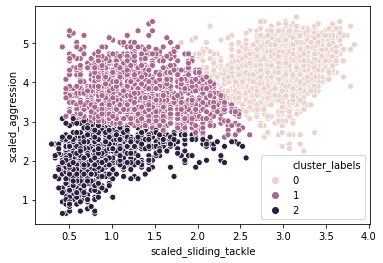

In [20]:
sns.scatterplot(x = 'scaled_sliding_tackle', y = 'scaled_aggression', hue = 'cluster_labels', data=fifa)
plt.show()

# Elbow Method

## Distinct Cluster

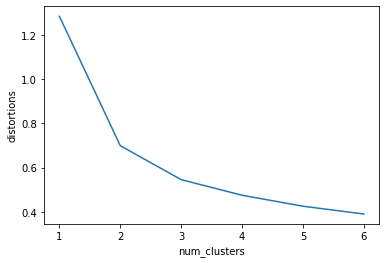

In [21]:
distortions = []
num_clusters = range(1, 7)

# Create a list of distortions from the kmeans function
for i in num_clusters:
    cluster_centers, distortion = kmeans(fifa[['scaled_sliding_tackle', 'scaled_aggression']], i)
    distortions.append(distortion)

# Create a data frame with two lists - num_clusters, distortions
elbow_plot = pd.DataFrame({'num_clusters': num_clusters, 'distortions': distortions})

# Creat a line plot of num_clusters and distortions
sns.lineplot(x='num_clusters', y='distortions', data = elbow_plot)
plt.xticks(num_clusters)
plt.show()

## Uniform Cluster